In [232]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [233]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [234]:
df = pd.read_csv("https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data-130k-v2.csv", index_col=0)


In [235]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [236]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [249]:
negara = df.groupby("country")
negara.describe()

points                       ... price                
                          count       mean       std  ...   50%     75%     max
country                                               ...                      
Argentina                3800.0  86.710263  3.179627  ...  17.0   25.00   230.0
Armenia                     2.0  87.500000  0.707107  ...  14.5   14.75    15.0
Australia                2329.0  88.580507  2.989900  ...  21.0   38.00   850.0
Austria                  3345.0  90.101345  2.499799  ...  25.0   36.50  1100.0
Bosnia and Herzegovina      2.0  86.500000  2.121320  ...  12.5   12.75    13.0
Brazil                     52.0  84.673077  2.340782  ...  20.0   29.00    60.0
Bulgaria                  141.0  87.936170  2.077817  ...  13.0   16.00   100.0
Canada                    257.0  89.369650  2.384752  ...  30.0   40.75   120.0
Chile                    4472.0  86.493515  2.692959  ...  15.0   20.00   400.0
China                       1.0  89.000000       NaN  ...  18.0   18.00    18.0
Croatia                    73.0  87.219178  2.399344  ...  20.0   27.50    65.0
Cyprus                     11.0  87.181818  1.601136  ...  16.0   17.50    21.0
Czech Republic             12.0  87.250000  1.712255  ...  18.0   28.75    45.0
Egypt                       1.0  84.000000       NaN  ...   NaN     NaN     NaN
England                    74.0  91.581081  1.843216  ...  50.0   60.00    95.0
France                  22093.0  88.845109  3.044423  ...  25.0   43.00  3300.0
Georgia                    86.0  87.686047  2.087845  ...  17.5   25.00    40.0
Germany                  2165.0  89.851732  2.469351  ...  26.0   42.00   775.0
Greece                    466.0  87.283262  2.185293  ...  19.0   26.00    79.0
Hungary                   146.0  89.191781  2.686659  ...  25.0   39.00   764.0
India                       9.0  90.222222  1.715938  ...  12.0   13.00    20.0
Israel                    505.0  88.471287  2.478412  ...  25.0   40.00   150.0
Italy                   19540.0  88.562231  2.649756  ...  28.0   50.00   900.0
Lebanon                    35.0  87.685714  2.784109  ...  25.0   40.00    75.0
Luxembourg                  6.0  88.666667  0.816497  ...  23.0   25.25    30.0
Macedonia                  12.0  86.833333  1.749459  ...  15.0   15.25    20.0
Mexico                     70.0  85.257143  2.722348  ...  22.0   29.50   108.0
Moldova                    59.0  87.203390  2.419601  ...  13.0   21.00    42.0
Morocco                    28.0  88.571429  1.687175  ...  18.0   18.00    40.0
New Zealand              1419.0  88.303030  2.435008  ...  20.0   30.00   130.0
Peru                       16.0  83.562500  1.860779  ...  14.5   17.00    68.0
Portugal                 5691.0  88.250220  2.996122  ...  16.0   28.00  1000.0
Romania                   120.0  86.400000  1.716945  ...   9.0   12.00   320.0
Serbia                     12.0  87.500000  1.314257  ...  21.0   29.50    42.0
Slovakia                    1.0  87.000000       NaN  ...  16.0   16.00    16.0
Slovenia                   87.0  88.068966  1.730661  ...  20.0   30.00    90.0
South Africa             1401.0  88.056388  2.435826  ...  19.0   29.00   330.0
Spain                    6645.0  87.288337  3.066284  ...  18.0   30.00   770.0
Switzerland                 7.0  88.571429  2.507133  ...  38.0  160.00   160.0
Turkey                     90.0  88.088889  1.975379  ...  20.0   27.75   120.0
US                      54504.0  88.563720  3.114840  ...  30.0   45.00  2013.0
Ukraine                    14.0  84.071429  1.591530  ...   9.0   10.00    13.0
Uruguay                   109.0  86.752294  2.687957  ...  20.0   29.00   130.0

[43 rows x 16 columns]

In [250]:
negara.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


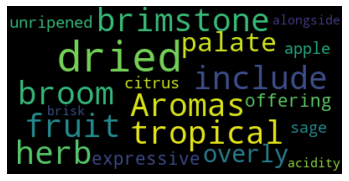

In [251]:
text = df.description[0]
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 31661073 words in the combination of all review.


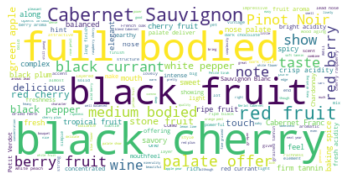

In [252]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [253]:
cone_mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/cone1.png"))
cone_mask = cone_mask.reshape((cone_mask.shape[0],-1), order='F')
cone_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [254]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [255]:
# Transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((cone_mask.shape[0],cone_mask.shape[1]), np.int32)

for i in range(len(cone_mask)):
    transformed_mask[i] = list(map(transform_format, cone_mask[i]))

In [243]:
# Check the expected result of your mask
transformed_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

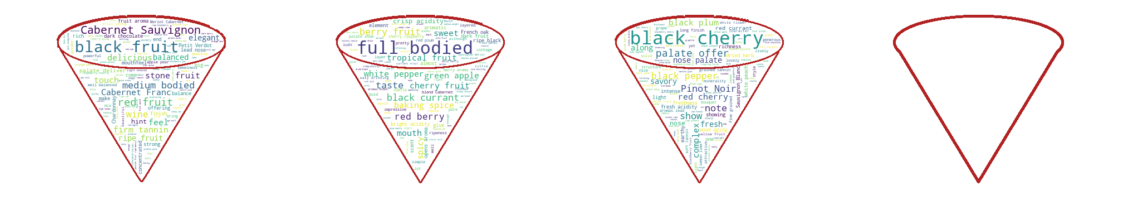

In [256]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
               stopwords=stopwords, contour_width=2, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("/content/drive/My Drive/visdat/Images/cone1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [257]:
negara.size().sort_values(ascending=False).head(10)

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
dtype: int64

In [258]:
# Join all reviews of each country:
chl = " ".join(review for review in df[df["country"]=="Chile"].description)
arg = " ".join(review for review in df[df["country"]=="Argentina"].description)
aus = " ".join(review for review in df[df["country"]=="Austria"].description)
ast = " ".join(review for review in df[df["country"]=="Australia"].description)
ger = " ".join(review for review in df[df["country"]=="Germany"].description)

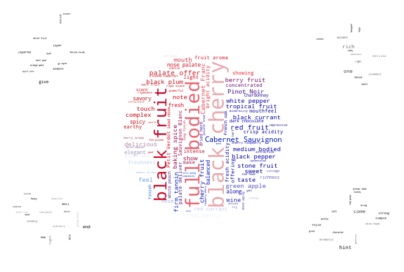

In [275]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/korea.jpg"))
wordcloud_txt = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_txt.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("korea.png", format="png")

plt.show()

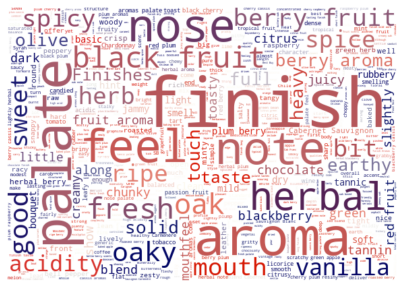

In [274]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/inggris.jpg"))
wordcloud_chl = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(chl)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_chl.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("inggris.png", format="png")

plt.show()

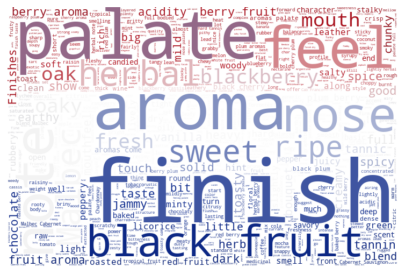

In [273]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/belanda.jpg"))
wordcloud_arg = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(arg)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_arg.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("belanda.png", format="png")

plt.show()

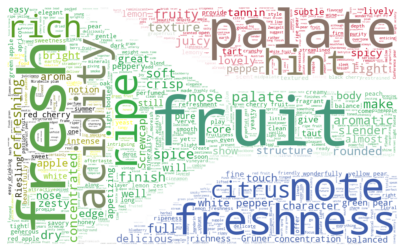

In [272]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/afrikaselatan.jpg"))
wordcloud_aus = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(aus)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_aus.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("afrikaselatan.png", format="png")

plt.show()

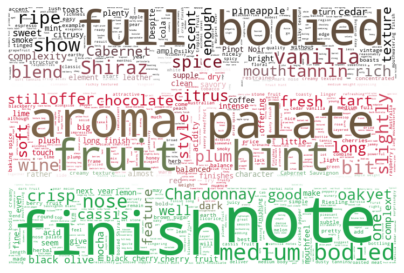

In [271]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/kenya.jpg"))
wordcloud_ast = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(ast)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ast.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("kenya.png", format="png")

plt.show()

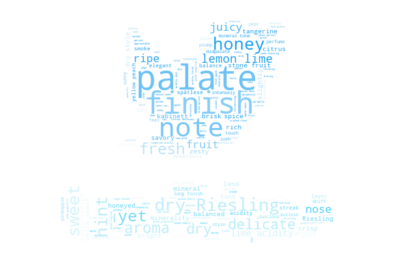

In [270]:
# Generate a word cloud image
mask = np.array(Image.open("/content/drive/My Drive/visdat/Images/twitter.jpg"))
wordcloud_ger = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(ger)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ger.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("twitter.png", format="png")

plt.show()